# Five-classes sentiment analysis using Naive Bayes (Ordinal Classification approach)

In [ ]:
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Dataset

In [ ]:
import pandas as pd

In [ ]:
reviews_dataset = pd.read_csv("reviews_preprocessed.csv")

In [ ]:
len(reviews_dataset)

11879

In [ ]:
#reviews_dataset = reviews_dataset[reviews_dataset["word_count"]>2]
print("1 star rating count: " ,len(reviews_dataset[reviews_dataset["score"] == 0]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")

1 star rating count:  2336 

2 stars rating count:  2337 

3 stars rating count:  2391 

4 stars rating count:  2391 

5 stars rating count:  2424 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


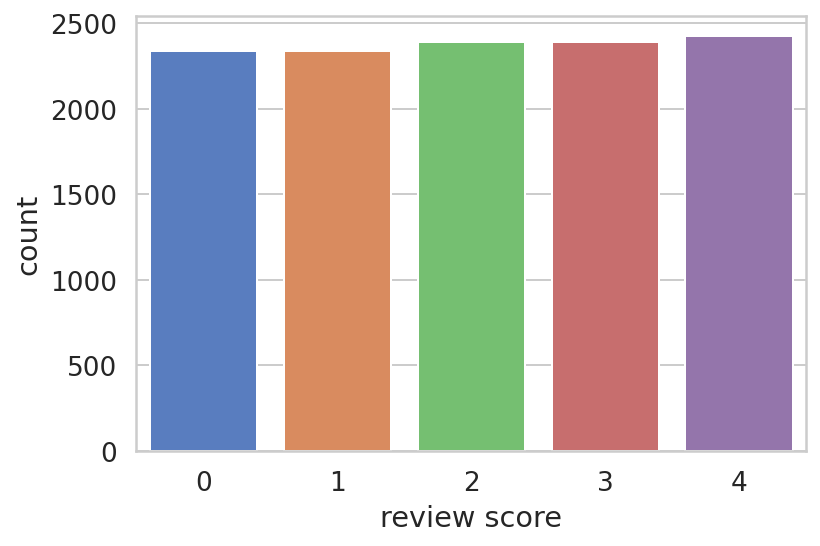

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

In [ ]:
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000


In [ ]:
reviews_dataset["more_than_1_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 1) else 0)

In [ ]:
reviews_dataset["more_than_2_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 2) else 0)

In [ ]:
reviews_dataset["more_than_3_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 3) else 0)

In [ ]:
reviews_dataset["more_than_4_star"] = reviews_dataset.score.apply(lambda x: 1 if (x+1 > 4) else 0)

In [ ]:
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity,more_than_1_star,more_than_2_star,more_than_3_star,more_than_4_star
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481,0,0,0,0
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000,0,0,0,0
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000,0,0,0,0
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000,0,0,0,0
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into training and testing data
x = reviews_dataset['content']
y = reviews_dataset[['score', 'more_than_1_star', 'more_than_2_star', 'more_than_3_star', 'more_than_4_star']]
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.16, random_state=42)

## The model

### Classifier 1

In [ ]:
# Split into training and testing data
y1 = y['more_than_1_star']

In [ ]:
y1_test = y_test['more_than_1_star']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
params={ 
        'count_vect__max_df': [0.2,0.4,0.6,0.8,1.0],
        'count_vect__min_df': [0.0,0.02,0.05,0.1,0.2],
        'count_vect__ngram_range':[(1,1),(1, 2)],
        'clf__alpha':[.01,.5,1.0],
        'clf__fit_prior':[True,False]
       }

In [ ]:
classifier_pipline1 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', MultinomialNB())
                      ]
                    )
classifier_pipline1

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid1 = GridSearchCV(classifier_pipline1, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid1

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid1.fit(x, y1)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'NB_ordinal1.sav'
pickle.dump(grid1, open(filename, 'wb'))

In [ ]:
# some time later...
filename = 'NB_ordinal1.sav'
# load the model from disk
grid1 = pickle.load(open(filename, 'rb'))
result = grid1.score(x_test, y1_test)
print(result)

0.8342977380326144


In [ ]:
best_model1= grid1.best_estimator_
best_model1

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.2,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
best_model1["clf"].class_count_

array([1962., 8016.])

In [ ]:
best_model1["clf"].classes_

array([0, 1])

In [ ]:
grid1.best_score_

0.8313306311871864

In [ ]:
grid1.best_params_

{'clf__alpha': 1.0,
 'clf__fit_prior': True,
 'count_vect__max_df': 0.2,
 'count_vect__min_df': 0.0,
 'count_vect__ngram_range': (1, 1)}

In [ ]:
score1 = grid1.score(x_test, y1_test)
score1

0.8342977380326144

In [ ]:
y1_pred = grid1.predict(x_test)

In [ ]:
y1_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy1 = accuracy_score(y1_test, y1_pred)
accuracy1

0.8342977380326144

In [ ]:
y1_pred_proba = grid1.predict_proba(x_test)
y1_pred_proba

array([[2.63312024e-08, 9.99999974e-01],
       [1.37947263e-03, 9.98620527e-01],
       [6.28600114e-01, 3.71399886e-01],
       ...,
       [5.04838385e-01, 4.95161615e-01],
       [2.48438303e-02, 9.75156170e-01],
       [1.37671529e-04, 9.99862328e-01]])

In [ ]:
y1_pred_proba = y1_pred_proba[:,1]
y1_pred_proba

array([0.99999997, 0.99862053, 0.37139989, ..., 0.49516161, 0.97515617,
       0.99986233])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid1.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid1.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
precision1 = precision_score(y1_test, y1_pred)

In [ ]:
precision1

0.8768656716417911

In [ ]:
recall1 = recall_score(y1_test, y1_pred)

In [ ]:
recall1

0.9233791748526523

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score1 = f1_score(y1_test, y1_pred)
f1_score1

0.8995215311004785

In [ ]:
conf_mx1 = confusion_matrix(y1_test, y1_pred)
conf_mx1

array([[ 176,  198],
       [ 117, 1410]])

### Classifier 2

In [ ]:
y2 = y['more_than_2_star']
y2_test = y_test['more_than_2_star']

In [ ]:
classifier_pipline2 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', MultinomialNB())
                      ]
                    )
classifier_pipline2

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
grid2 = GridSearchCV(classifier_pipline2, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid2

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid2.fit(x, y2)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'NB_ordinal2.sav'
pickle.dump(grid2, open(filename, 'wb'))

In [ ]:
# some time later...
filename = 'NB_ordinal2.sav'
# load the model from disk
grid2 = pickle.load(open(filename, 'rb'))
result = grid2.score(x_test, y2_test)
print(result)

0.7822198842714361


In [ ]:
best_model2= grid2.best_estimator_
best_model2

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.2,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False))],
         verbose=False)

In [ ]:
best_model2["clf"].class_count_

array([3925., 6053.])

In [ ]:
best_model2["clf"].classes_

array([0, 1])

In [ ]:
grid2.best_score_

0.7814185765013736

In [ ]:
grid2.best_params_

{'clf__alpha': 0.5,
 'clf__fit_prior': False,
 'count_vect__max_df': 0.2,
 'count_vect__min_df': 0.0,
 'count_vect__ngram_range': (1, 2)}

In [ ]:
score2 = grid2.score(x_test, y2_test)
score2

0.7822198842714361

In [ ]:
y2_pred = grid2.predict(x_test)
y2_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy2

0.7822198842714361

In [ ]:
y2_pred_proba = grid2.predict_proba(x_test)
y2_pred_proba

array([[1.40040563e-14, 1.00000000e+00],
       [5.22098036e-03, 9.94779020e-01],
       [9.90549927e-01, 9.45007254e-03],
       ...,
       [9.97633859e-01, 2.36614127e-03],
       [3.56496109e-01, 6.43503891e-01],
       [1.24031794e-07, 9.99999876e-01]])

In [ ]:
y2_pred_proba = y2_pred_proba[:,1]
y2_pred_proba

array([1.        , 0.99477902, 0.00945007, ..., 0.00236614, 0.64350389,
       0.99999988])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid2.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid2.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision2 = precision_score(y2_test, y2_pred)

In [ ]:
precision2

0.8155422715627668

In [ ]:
recall2 = recall_score(y2_test, y2_pred)

In [ ]:
recall2

0.8282740676496098

In [ ]:
f1_score2 = f1_score(y2_test, y2_pred)
f1_score2

0.8218588640275387

In [ ]:
conf_mx2 = confusion_matrix(y2_test, y2_pred)
conf_mx2

array([[532, 216],
       [198, 955]])

### Classifier 3

In [ ]:
y3 = y['more_than_3_star']
y3_test = y_test['more_than_3_star']

In [ ]:
classifier_pipline3 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', MultinomialNB())
                      ]
                    )
classifier_pipline3

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
grid3 = GridSearchCV(classifier_pipline3, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid3

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid3.fit(x, y3)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'NB_ordinal3.sav'
pickle.dump(grid3, open(filename, 'wb'))

In [ ]:
filename = 'NB_ordinal3.sav'
grid3 = pickle.load(open(filename, 'rb'))
result = grid3.score(x_test, y3_test)
print(result)

0.8269331930562862


In [ ]:
best_model3= grid3.best_estimator_
best_model3

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.2,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
best_model3["clf"].class_count_

array([5933., 4045.])

In [ ]:
best_model3["clf"].classes_

array([0, 1])

In [ ]:
grid3.best_score_

0.8212069251284524

In [ ]:
grid3.best_params_

{'clf__alpha': 1.0,
 'clf__fit_prior': True,
 'count_vect__max_df': 0.2,
 'count_vect__min_df': 0.0,
 'count_vect__ngram_range': (1, 2)}

In [ ]:
score3 = grid3.score(x_test, y3_test)
score3

0.8269331930562862

In [ ]:
y3_pred = grid3.predict(x_test)
y3_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy3 = accuracy_score(y3_test, y3_pred)
accuracy3

0.8269331930562862

In [ ]:
y3_pred_proba = grid3.predict_proba(x_test)
y3_pred_proba

array([[3.02996283e-11, 1.00000000e+00],
       [7.23955201e-01, 2.76044799e-01],
       [9.99996653e-01, 3.34666371e-06],
       ...,
       [9.99978619e-01, 2.13814914e-05],
       [9.49757278e-01, 5.02427224e-02],
       [7.28486216e-07, 9.99999272e-01]])

In [ ]:
y3_pred_proba = y3_pred_proba[:,1]
y3_pred_proba

array([1.00000000e+00, 2.76044799e-01, 3.34666371e-06, ...,
       2.13814914e-05, 5.02427224e-02, 9.99999272e-01])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid3.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid3.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision3 = precision_score(y3_test, y3_pred)

In [ ]:
precision3

0.8066759388038943

In [ ]:
recall3 = recall_score(y3_test, y3_pred)

In [ ]:
recall3

0.7532467532467533

In [ ]:
f1_score3 = f1_score(y3_test, y3_pred)
f1_score3

0.7790463398253862

In [ ]:
conf_mx3 = confusion_matrix(y1_test, y1_pred)
conf_mx3

array([[ 176,  198],
       [ 117, 1410]])

### Classifier 4

In [ ]:
y4 = y['more_than_4_star']
y4_test = y_test['more_than_4_star']

In [ ]:
classifier_pipline4 = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', MultinomialNB())
                      ]
                    )
classifier_pipline4

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
grid4 = GridSearchCV(classifier_pipline4, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid4

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid4.fit(x, y4)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
# save the model to disk
filename = 'NB_ordinal4.sav'
pickle.dump(grid4, open(filename, 'wb'))

In [ ]:
filename = 'NB_ordinal4.sav'
grid4 = pickle.load(open(filename, 'rb'))
result = grid4.score(x_test, y4_test)
print(result)

0.8537611783271962


In [ ]:
best_model4= grid4.best_estimator_
best_model4

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.6,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
best_model4["clf"].class_count_

array([7942., 2036.])

In [ ]:
best_model4["clf"].classes_

array([0, 1])

In [ ]:
grid4.best_score_

0.8636003334990784

In [ ]:
grid4.best_params_

{'clf__alpha': 1.0,
 'clf__fit_prior': True,
 'count_vect__max_df': 0.6,
 'count_vect__min_df': 0.0,
 'count_vect__ngram_range': (1, 1)}

In [ ]:
score4 = grid4.score(x_test, y4_test)
score4

0.8537611783271962

In [ ]:
y4_pred = grid4.predict(x_test)
y4_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy4 = accuracy_score(y4_test, y4_pred)
accuracy4

0.8537611783271962

In [ ]:
y4_pred_proba = grid4.predict_proba(x_test)
y4_pred_proba

array([[3.70591221e-04, 9.99629409e-01],
       [9.99638266e-01, 3.61734308e-04],
       [9.99996290e-01, 3.71018969e-06],
       ...,
       [9.99694102e-01, 3.05898331e-04],
       [9.91834975e-01, 8.16502488e-03],
       [3.51236116e-03, 9.96487639e-01]])

In [ ]:
y4_pred_proba = y4_pred_proba[:,1]
y4_pred_proba

array([9.99629409e-01, 3.61734308e-04, 3.71018969e-06, ...,
       3.05898331e-04, 8.16502488e-03, 9.96487639e-01])

In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid4.predict(['Love this app simply awesome!'])

array([1])

In [ ]:
grid4.predict(['I had a very bad experience with this app, the userinterface is awful'])

array([0])

In [ ]:
precision4 = precision_score(y4_test, y4_pred)

In [ ]:
precision4

0.6502732240437158

In [ ]:
recall4 = recall_score(y4_test, y4_pred)

In [ ]:
recall4

0.6134020618556701

In [ ]:
f1_score4 = f1_score(y4_test, y4_pred)
f1_score4

0.6312997347480106

In [ ]:
conf_mx4 = confusion_matrix(y4_test, y4_pred)
conf_mx4

array([[1385,  128],
       [ 150,  238]])

In [ ]:
import numpy as np

In [ ]:
def ordinal_classification_predict(binary_predictions):
  classes_proba = []
  classes_proba.append(1-binary_predictions[0])
  classes_proba.append(binary_predictions[0]-binary_predictions[1])
  classes_proba.append(binary_predictions[1]-binary_predictions[2])
  classes_proba.append(binary_predictions[2]-binary_predictions[3])
  classes_proba.append(binary_predictions[3])

  return np.argmax(classes_proba)
  

In [ ]:
def ordinal_classification_predict_proba(binary_predictions):
  class1 = (1-binary_predictions[0])
  class2 = (binary_predictions[0]-binary_predictions[1])
  class3 = (binary_predictions[1]-binary_predictions[2])
  class4 = (binary_predictions[2]-binary_predictions[3])
  class5 = (binary_predictions[3])

  return [class1, class2, class3, class4, class5]

In [ ]:
y1_series = pd.Series(y1_pred_proba)
y2_series = pd.Series(y2_pred_proba)
y3_series = pd.Series(y3_pred_proba)
y4_series = pd.Series(y4_pred_proba)

binary_preds = { 'more_than_1_star': y1_series,
                 'more_than_2_star': y2_series,
                 'more_than_3_star': y3_series,
                 'more_than_4_star': y4_series}
binary_preds_df = pd.DataFrame(binary_preds)

In [ ]:
binary_preds_df.head()

,more_than_1_star,more_than_2_star,more_than_3_star,more_than_4_star
0,1.000000,1.000000,1.000000,0.999629
1,0.998621,0.994779,0.276045,0.000362
2,0.371400,0.009450,0.000003,0.000004
3,0.830762,0.488866,0.126677,0.065867
4,0.998838,0.999902,0.993505,0.533275


In [ ]:
y_pred = binary_preds_df.apply(lambda row: ordinal_classification_predict(row), axis=1)

In [ ]:
y_pred_proba = binary_preds_df.apply(lambda row: ordinal_classification_predict_proba(row), axis=1)

In [ ]:
y_pred.values

array([4, 2, 0, ..., 0, 2, 4])

In [ ]:
y_pred_proba = np.stack(y_pred_proba.values)
y_pred_proba

array([[ 2.63312071e-08, -2.63312071e-08,  3.02975423e-11,
         3.70591190e-04,  9.99629409e-01],
       [ 1.37947263e-03,  3.84150774e-03,  7.18734220e-01,
         2.75683065e-01,  3.61734308e-04],
       [ 6.28600114e-01,  3.61949814e-01,  9.44672588e-03,
        -3.63525979e-07,  3.71018969e-06],
       ...,
       [ 5.04838385e-01,  4.92795474e-01,  2.34475978e-03,
        -2.84516840e-04,  3.05898331e-04],
       [ 2.48438303e-02,  3.31652279e-01,  5.93261168e-01,
         4.20776975e-02,  8.16502488e-03],
       [ 1.37671529e-04, -1.37547497e-04,  6.04454412e-07,
         3.51163267e-03,  9.96487639e-01]])

In [ ]:
y_test = y_test["score"]
y_test.values

array([4, 3, 2, ..., 1, 1, 3])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4513413992635455

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[177, 118,  69,   8,   2],
       [ 81, 154, 112,  18,   9],
       [ 31, 116, 136,  78,  22],
       [  4,  29, 101, 149,  99],
       [  7,  12,  38,  89, 242]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [ ]:
import numpy as np

In [ ]:
class_names = ['strongly_neg','neg','neutral','pos','strongly_pos']

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="f", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');


In [ ]:
df_cm = pd.DataFrame(conf_mx, index=class_names, columns=class_names)

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mx = conf_mx / row_sums

[[374]
 [374]
 [383]
 [382]
 [388]]


In [ ]:
df_norm_cm = pd.DataFrame(norm_conf_mx, index=class_names, columns=class_names)

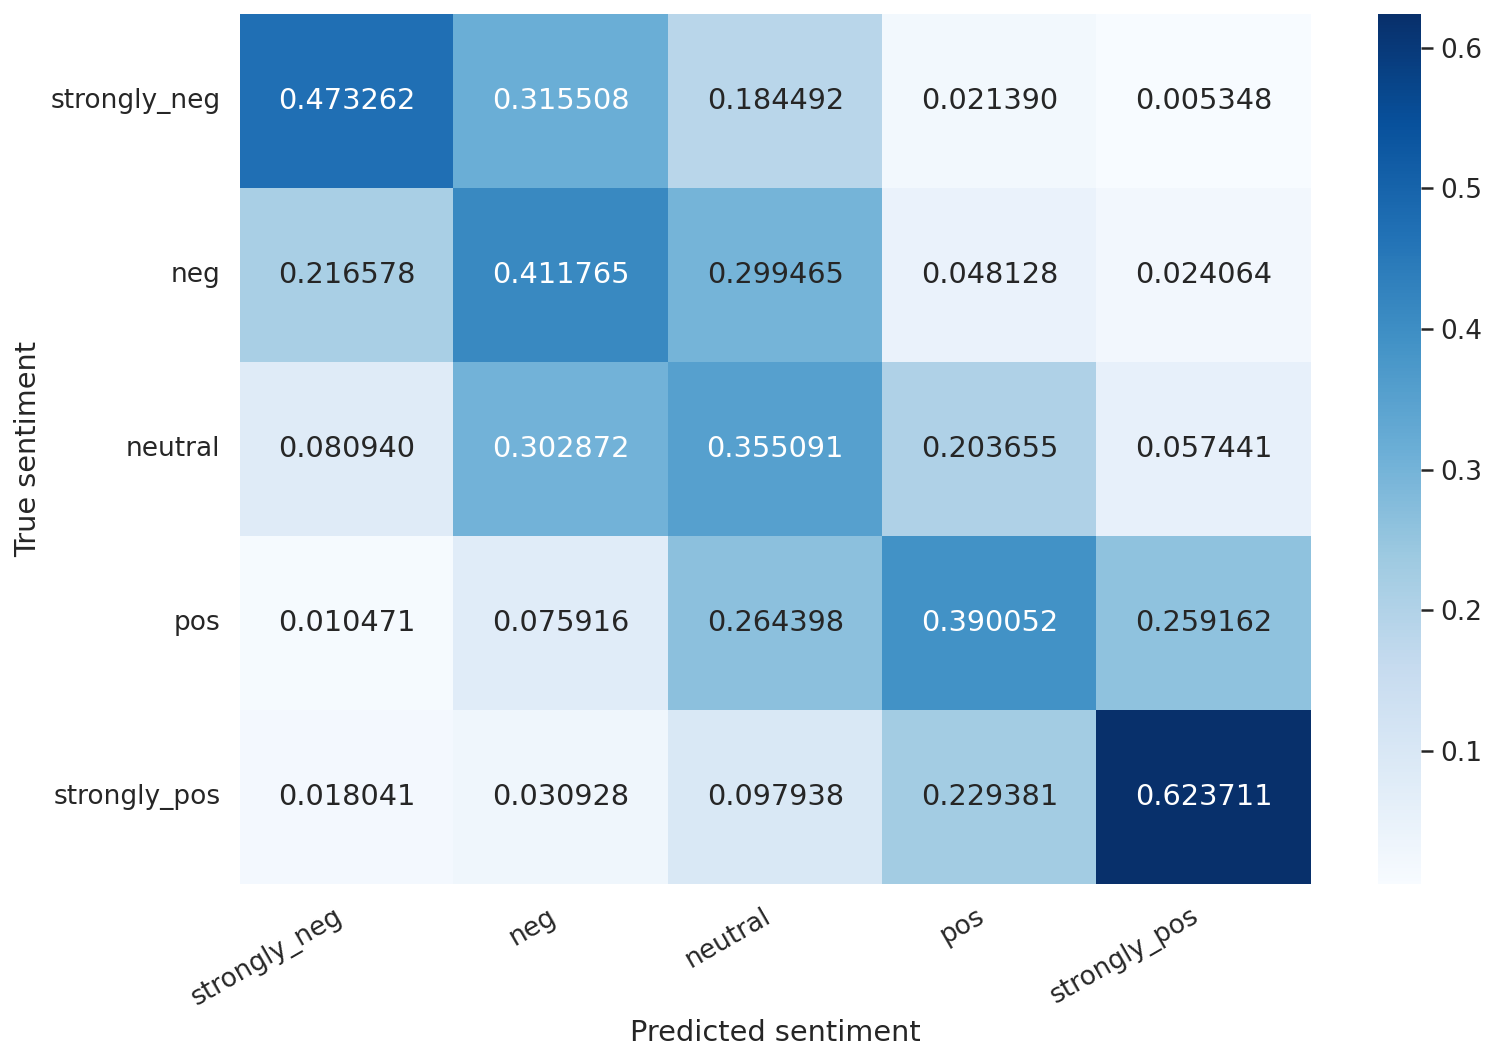

In [ ]:
show_confusion_matrix(df_norm_cm)

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)

In [ ]:
df_norm_cm = pd.DataFrame(norm_conf_mx, index=class_names, columns=class_names)

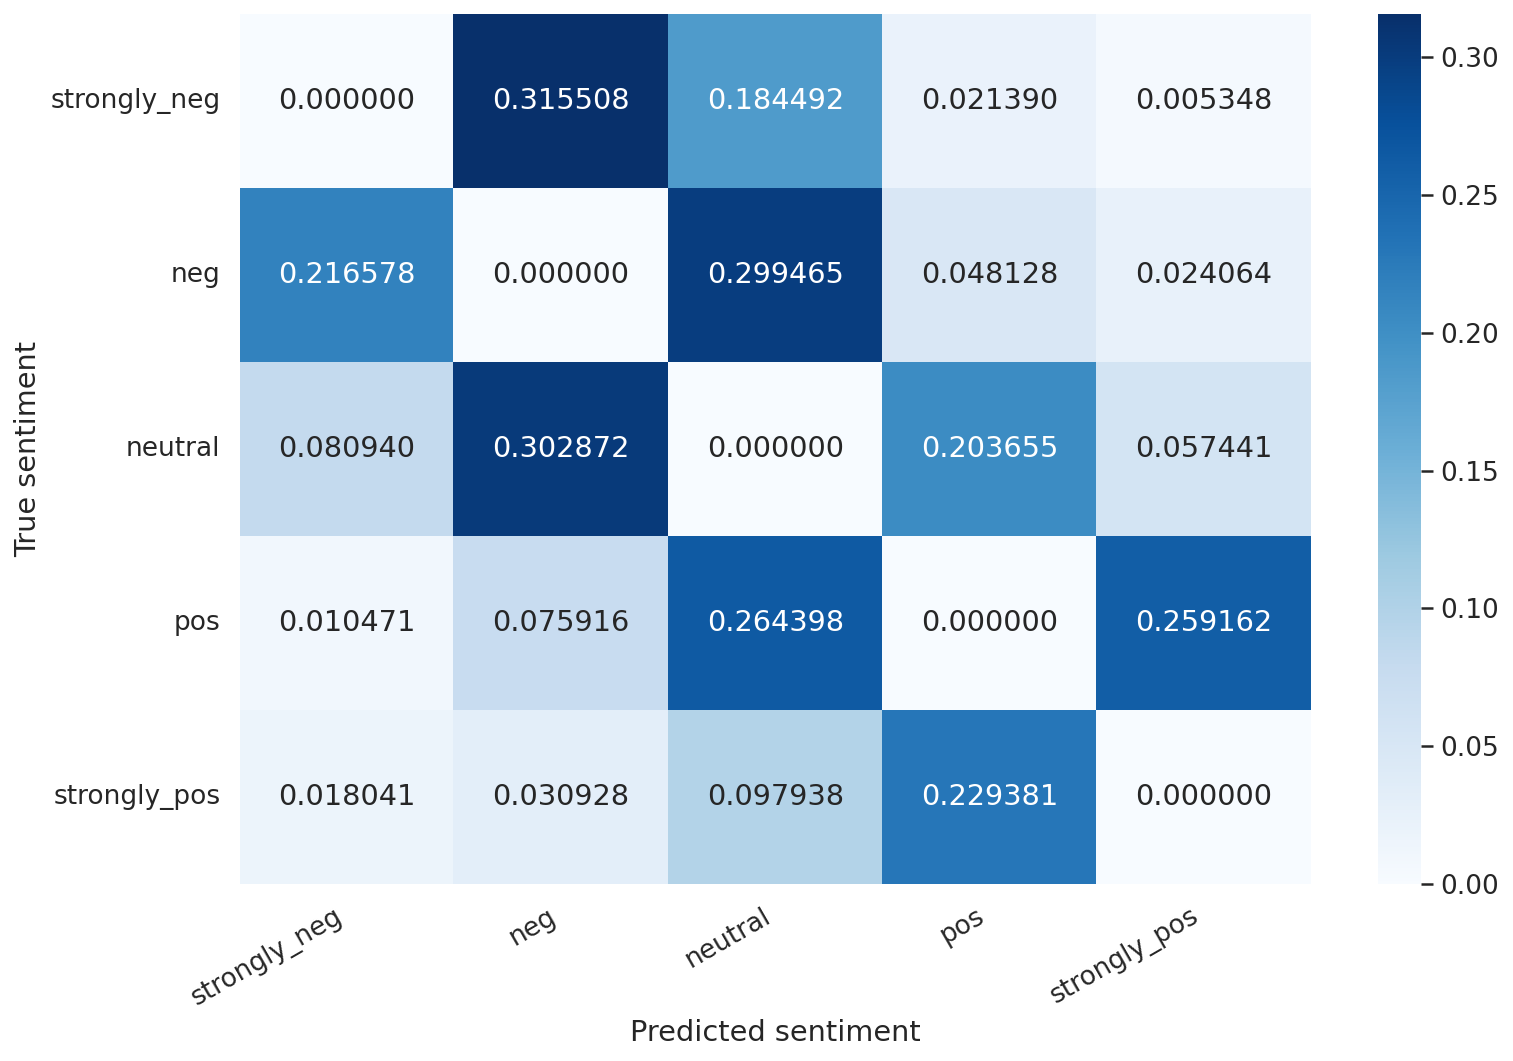

In [ ]:
show_confusion_matrix(df_norm_cm)

## Precision / Recall

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Use label_binarize to be multi-label like settings
y_test_mult = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
print(y_test_mult)
print(y_pred_proba)

n_classes = y_test_mult.shape[1]
n_classes

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]
[[ 2.63312071e-08 -2.63312071e-08  3.02975423e-11  3.70591190e-04
   9.99629409e-01]
 [ 1.37947263e-03  3.84150774e-03  7.18734220e-01  2.75683065e-01
   3.61734308e-04]
 [ 6.28600114e-01  3.61949814e-01  9.44672588e-03 -3.63525979e-07
   3.71018969e-06]
 ...
 [ 5.04838385e-01  4.92795474e-01  2.34475978e-03 -2.84516840e-04
   3.05898331e-04]
 [ 2.48438303e-02  3.31652279e-01  5.93261168e-01  4.20776975e-02
   8.16502488e-03]
 [ 1.37671529e-04 -1.37547497e-04  6.04454412e-07  3.51163267e-03
   9.96487639e-01]]


5

In [ ]:
print(len(y_test_mult))
print(len(y_pred_proba))

1901
1901


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_mult[:, i],
                                                        y_pred_proba[:, i])
    
    curr_precision = precision[i]
    curr_recall = recall[i]

    precision[i] = precision[i][curr_precision+curr_recall > 0.0]
    recall[i] = recall[i][curr_precision+curr_recall > 0.0]

    average_precision[i] = average_precision_score(y_test_mult[:, i], y_pred_proba[:, i])

In [ ]:
# A "macro-average": Averaging over classes
# ====> Cannot do macro-average by the below approach because:
# len(precision[i]) depend on i (the unique probas in column i)
# the thresholds that based on it the precision & recall are calculated is not the same at the corresponding indices
#precision_sum = precision[0] + precision[1] + precision[2] + precision[3] + precision[4]
#precision["macro"] = precision_sum / 5
#recall_sum = recall[0] + recall[1] + recall[2] + recall[3] + recall[4]
#recall["macro"] = recall_sum / 5

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_mult.ravel(),
    y_pred_proba.ravel())


# compute F1 score
f1_score = dict()
# for each class
for i in range(n_classes):
  f1_score[i] = 2*((precision[i]*recall[i])/(precision[i]+recall[i]))

f1_score["micro"] = 2*((precision["micro"]*recall["micro"])/(precision["micro"]+recall["micro"]))

In [ ]:
average_precision["micro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="micro")
average_precision["macro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="macro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(average_precision["macro"]))

Average precision score, micro-averaged over all classes: 0.45
Average precision score, macro-averaged over all classes: 0.46


Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.45')

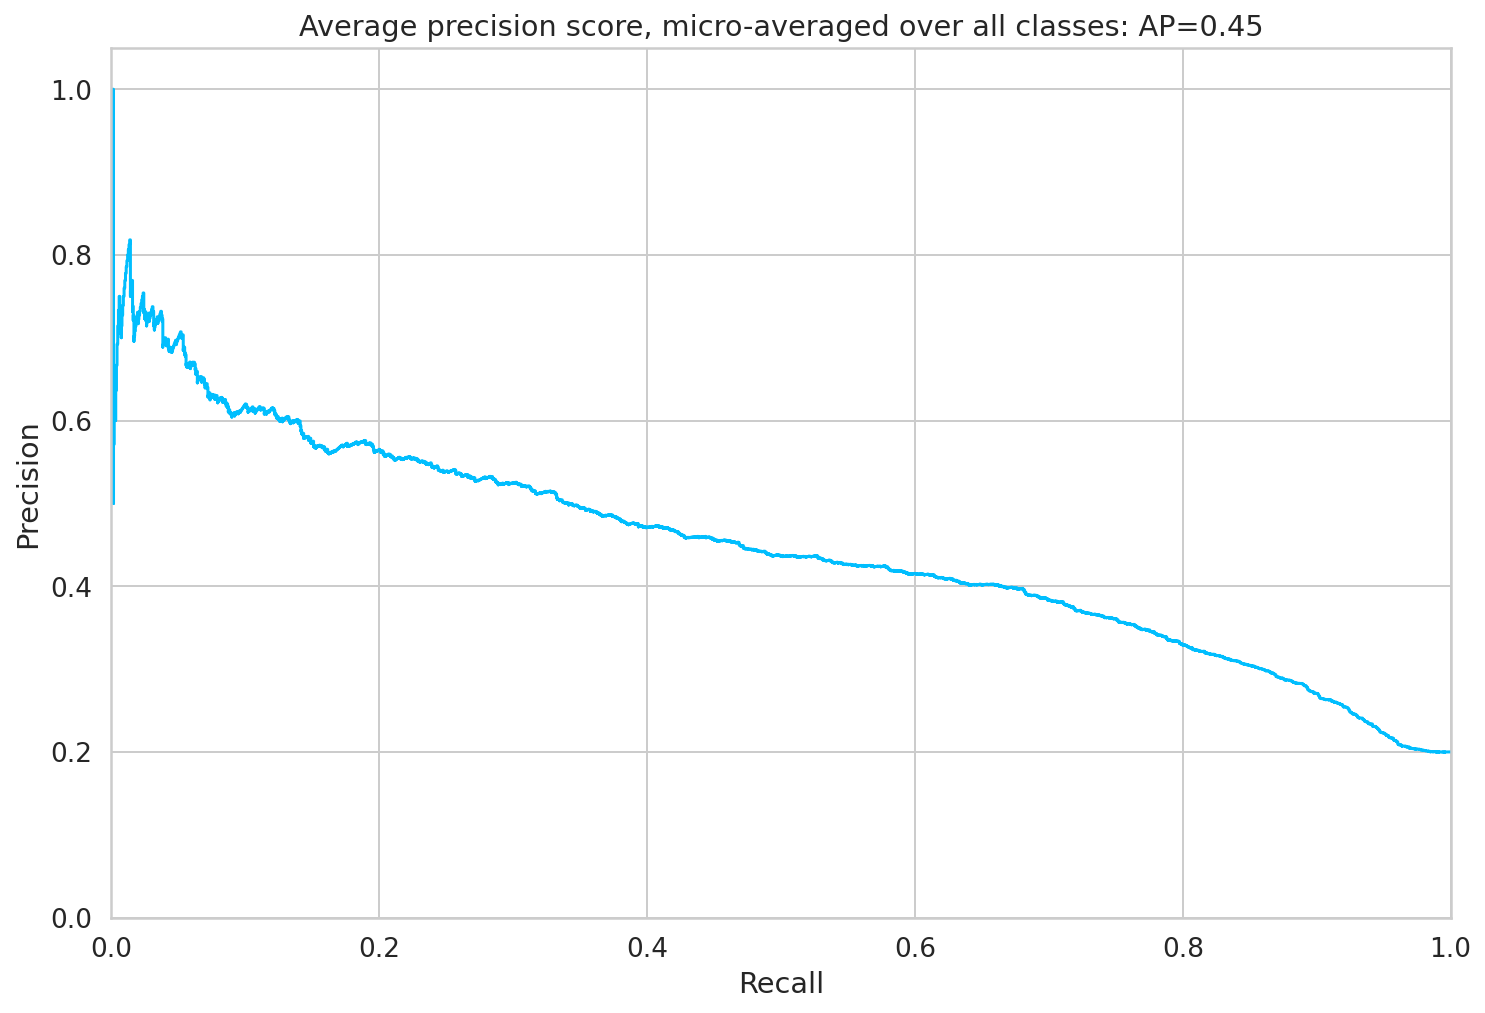

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

Plot Precision-Recall curve for each class and iso-f1 curves

In [ ]:
from itertools import cycle

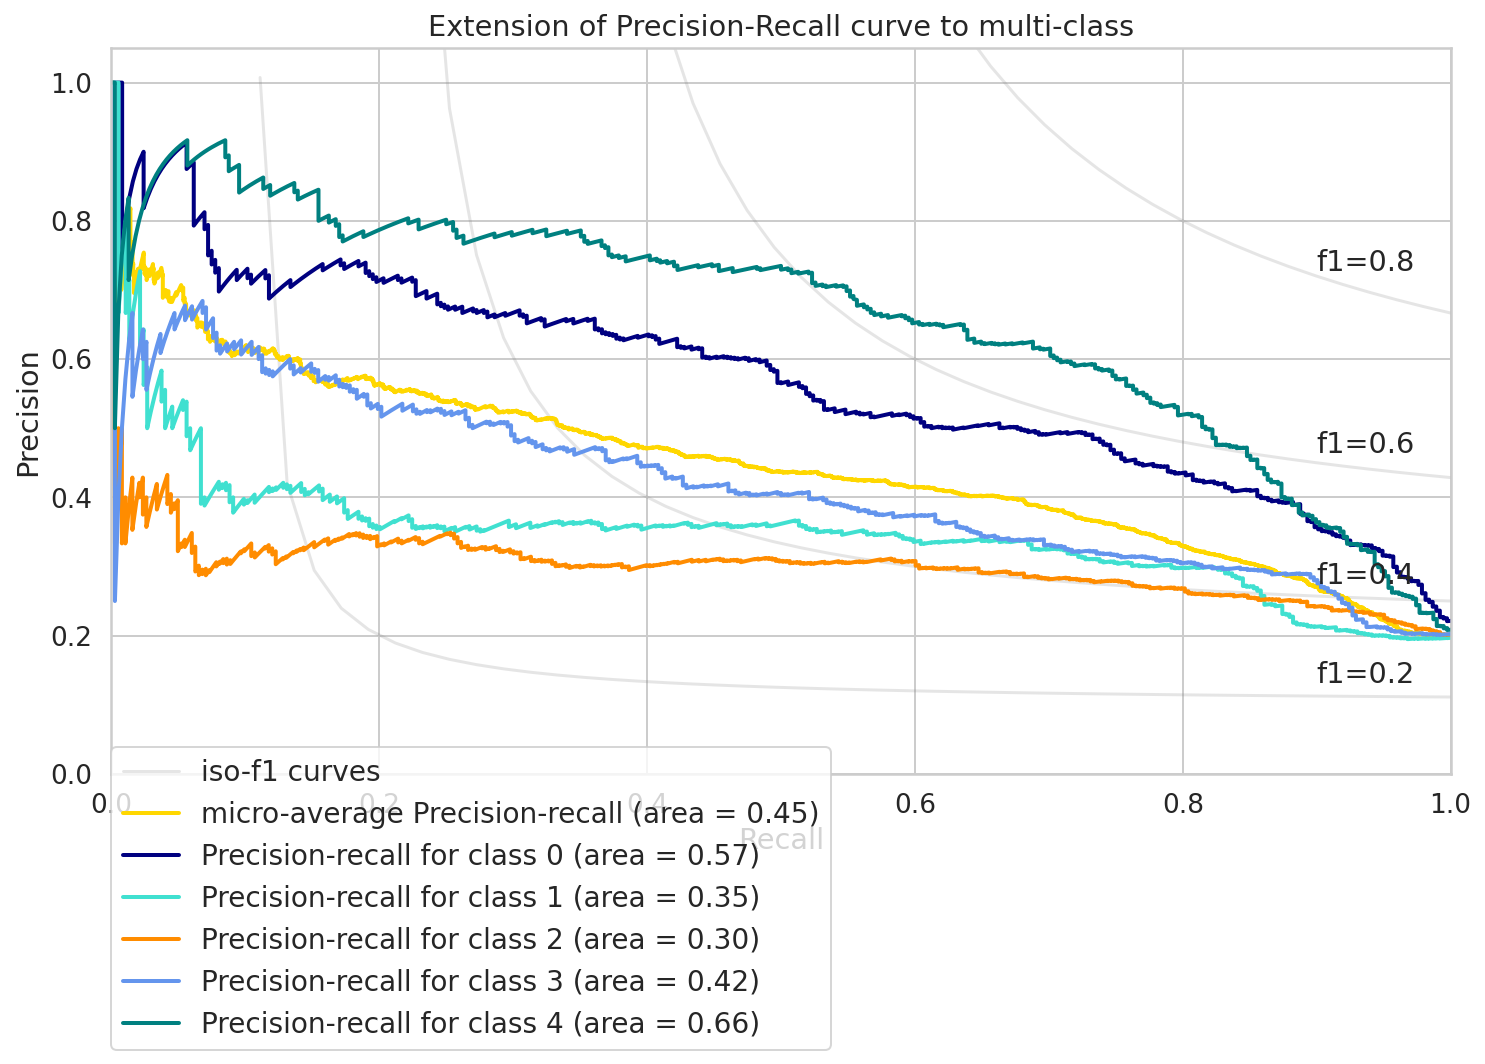

In [ ]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
